# Heart - Balanced Dataset

The dataset (from UCI repository) consists of various parameters, based on which we classify whether a person has heart disease or not.

1. age
2. sex
3. cp: Chest Pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital).
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes; 0 = no)
9. oldpeak - ST depression induced by exercise relative to rest
10. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
11. ca - number of major vessels (0-3) colored by flourosopy
12. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
13. target - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = <50% diameter narrowing; Value 1 = > 50% diameter narrowing)



## Pre-processing and Preliminary Analysis

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/content'

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Heart Disease Dataset/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values found.

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
from collections import Counter
Counter(data['target'])

Counter({0: 499, 1: 526})

In [9]:
data['target'].value_counts().sum()

1025

```r
Support:
1       526
0       499
        -----
Total   1025
```

No columns to drop, we move to splitting the inputs and targets:

In [10]:
X = data.iloc[:, :-1].values

In [11]:
X.shape

(1025, 13)

In [12]:
y = data.iloc[:, -1].values

In [13]:
y.shape

(1025,)

Split into test and train sets:

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train

array([[57.,  1.,  0., ...,  2.,  0.,  3.],
       [59.,  1.,  3., ...,  2.,  2.,  2.],
       [62.,  0.,  0., ...,  1.,  0.,  2.],
       ...,
       [56.,  1.,  0., ...,  1.,  1.,  2.],
       [62.,  1.,  0., ...,  1.,  2.,  3.],
       [64.,  1.,  3., ...,  1.,  0.,  3.]])

In [15]:
x_train.shape

(820, 13)

In [16]:
x_test.shape

(205, 13)

## Standardization

We need to standardize the values because it is a prerequisite for kNN algorithm.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## k-Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
y_pred_kNN = kNN.predict(x_test)
y_pred_kNN

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0])

### Performance Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
accuracy_score(y_test, y_pred_kNN)

0.8341463414634146

In [22]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       109
           1       0.79      0.88      0.83        96

    accuracy                           0.83       205
   macro avg       0.84      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



In [23]:
confusion_matrix(y_test, y_pred_kNN)

array([[87, 22],
       [12, 84]])

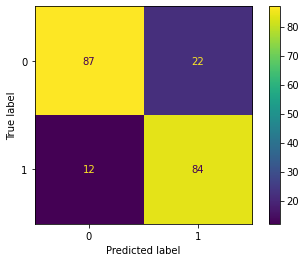

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_kNN), display_labels=['0', '1']).plot()

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
Logistic_Classifier = LogisticRegression()
Logistic_Classifier.fit(x_train, y_train)
Logistic_Classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
y_pred_LRC = Logistic_Classifier.predict(x_test)

### Performance Evaluation

In [27]:
accuracy_score(y_test, y_pred_LRC)

0.8097560975609757

In [28]:
print(classification_report(y_test, y_pred_LRC))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       109
           1       0.75      0.90      0.82        96

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [29]:
confusion_matrix(y_test, y_pred_LRC)

array([[80, 29],
       [10, 86]])

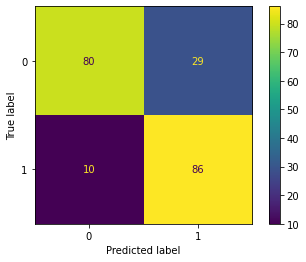

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_LRC), display_labels=['0', '1']).plot()

## Naive Bayes - Gaussian

In [31]:
from sklearn.naive_bayes import GaussianNB
Bayes = GaussianNB()
Bayes.fit(x_train, y_train)
Bayes.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [32]:
y_pred_Bayes = Bayes.predict(x_test)
y_pred_Bayes

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0])

### Performance Evaluation

In [33]:
accuracy_score(y_test, y_pred_Bayes)

0.7804878048780488

In [34]:
print(classification_report(y_test, y_pred_Bayes))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77       109
           1       0.72      0.86      0.79        96

    accuracy                           0.78       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.78      0.78       205



In [35]:
confusion_matrix(y_test, y_pred_Bayes)

array([[77, 32],
       [13, 83]])

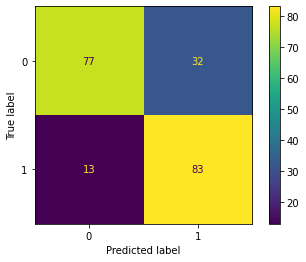

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_Bayes), display_labels=['0', '1']).plot()

## SVM

In [37]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(x_train, y_train)
support_vector.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [38]:
y_pred_svm = support_vector.predict(x_test)
y_pred_svm

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0])

### Performance Evaluation

In [39]:
accuracy_score(y_test, y_pred_svm)

0.926829268292683

In [40]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       109
           1       0.88      0.98      0.93        96

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [41]:
confusion_matrix(y_test, y_pred_svm)

array([[96, 13],
       [ 2, 94]])

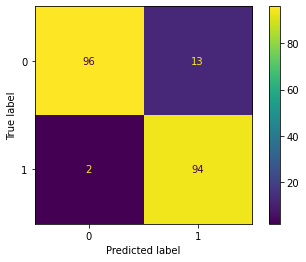

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=['0', '1']).plot()

## Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
y_pred_DT = DT_classifier.predict(x_test)
y_pred_DT

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0])

### Performance Evaluation

In [45]:
print('Accuracy of the Testing Set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the Testing Set:  1.0


In [46]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [47]:
confusion_matrix(y_test, y_pred_DT)

array([[109,   0],
       [  0,  96]])

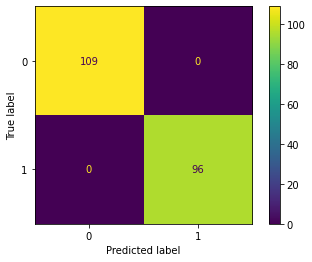

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_DT), display_labels=['0', '1']).plot()

In [49]:
y_train_pred_DT = DT_classifier.predict(x_train)
print('Accuracy Score of Training set: ', accuracy_score(y_train, y_train_pred_DT))

Accuracy Score of Training set:  1.0


## Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
y_pred_RF = RF_classifier.predict(x_test)
y_pred_RF

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0])

### Performance Evaluation

In [52]:
print('Accuracy of the Testing Set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the Testing Set:  1.0


In [53]:
y_train_pred_RF = RF_classifier.predict(x_train)
print('Accuracy Score of Training set: ', accuracy_score(y_train, y_train_pred_RF))

Accuracy Score of Training set:  1.0


In [54]:
confusion_matrix(y_test, y_pred_RF)

array([[109,   0],
       [  0,  96]])

In [55]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



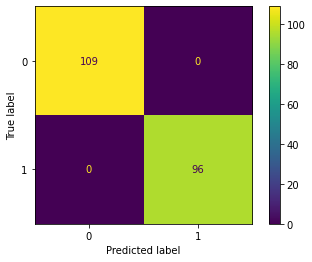

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_RF), display_labels=['0', '1']).plot()

## ROC Curve

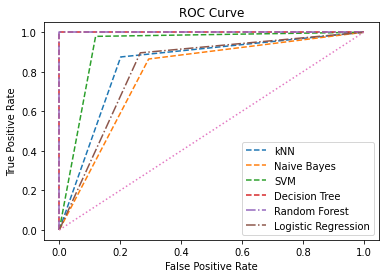

In [57]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_Bayes)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr3, tpr3, '--', label='SVM')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr4, tpr4, '--', label='Decision Tree')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr5, tpr5, '-.', label='Random Forest')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_LRC)
plt.plot(fpr6, tpr6, '-.', label='Logistic Regression')
plt.plot([0,1], [0,1], ':')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusion

Random Forest is the best fit of all the algorithms. However, let us analyze the performance of other algorithms. 

It is evident from the metrics that Decision Tree and SVM yields a relatively higher accuracy than Naive Bayes or k-Nearest Neighbors. In comparison with Decision Tree and Random Forests, the rest of the classifiers have lower accuracy.

It is worth noting that accuracy score is a good performance indicator in this case, since the dataset is a fully balanced dataset.

It is also possible to make a good inference from the F1-score and its macroaverage, which is higher in the case of Randoom Forest, Decision Tree and SVM in comparison to Bayes and kNN.

Therefore, Random Forest and Decision Tree is a better fit as a classifier out of the six algorithms.